[Versión interactiva](https://mybinder.org/v2/git/https%3A%2F%2Fgithub.com%2Fjuandadamo%2Fclases_fiuba/HEAD?filepath=Friction_tubes.ipynb)

In [1]:
!pip install CoolProp scipy numpy pint matplotlib fluids

In [2]:
import time, fluids, pint, matplotlib
from IPython.display import Image,Latex
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import CoolProp as cp
ureg = pint.UnitRegistry()#(fmt_locale='es_ES')
import warnings
warnings.filterwarnings('ignore')
#Tamaños de fuentes
font = {'family' : 'STIXGeneral','weight':'normal', 'size'   : 15}
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rc('font', **font)

In [95]:
titulo = "Oleoducto Cero Bayo - Bahía Brava"
titulo2 = "Traza inicial (aproximada)"

posiciones = np.array([0,15100,25e3,72e3])
alturas = [515,692,708,20]
Densidad = 860         #kg/m3
Viscosidad = 130e-6    #m2/s
Caudal = 12500/24/3600 #m3/s
Diam_i = 318e-3        #m
e = fluids.material_roughness('Seamless steel tubes, Used water piping')
eD = e/Diam_i

### Estacionario

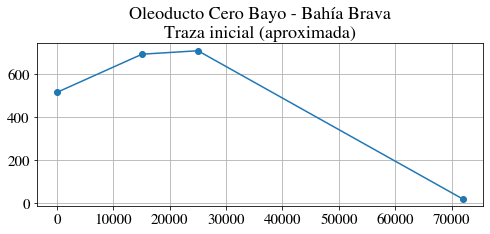

In [96]:
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(posiciones,alturas,'o-');
ax.grid()
ax.set_title(titulo+'\n'+ titulo2);

### Determinación de la presión en el primer punto
### Uso presion en el último punto igual a la atmosferica

In [97]:
Velocidad = Caudal / (Diam_i**2*np.pi/4)
Re = Velocidad * Diam_i / Viscosidad
longitudes = np.diff(posiciones)

deltap_fr = longitudes/Diam_i*(1/2)*Densidad*Velocidad**2*fluids.friction_factor(Re,eD)

#defino funcion para encontrar el valor mediante optimizacion
def calculo_p (DeltaP_bomba):
    presiones[0] = DeltaP_bomba + 101.3e3
    presiones[1] = presiones[0]+rho*g*(alturas[0] - alturas[1]) - deltap_fr[0]
    presiones[2] = presiones[1]+rho*g*(alturas[1] - alturas[2]) - deltap_fr[1]
    presiones[3] = presiones[2]+rho*g*(alturas[2] - alturas[3]) - deltap_fr[2]
    return (presiones[3] - 101.3e3)

In [ ]:
#aplico optimizacion
DeltaP_B = optimize.brentq(calculo_p,1e3,1e9)
presiones[0] = DeltaP_B + 101.3e3
presiones[1] = presiones[0]+rho*g*(alturas[0] - alturas[1]) - deltap_fr[0]
presiones[2] = presiones[1]+rho*g*(alturas[1] - alturas[2]) - deltap_fr[1]
presiones[3] = presiones[2]+rho*g*(alturas[2] - alturas[3]) - deltap_fr[2]    
   


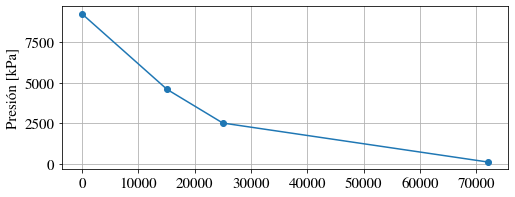

In [98]:
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(posiciones,presiones/1e3,'o-')
ax.set_ylabel('Presión [kPa]');
ax.grid()

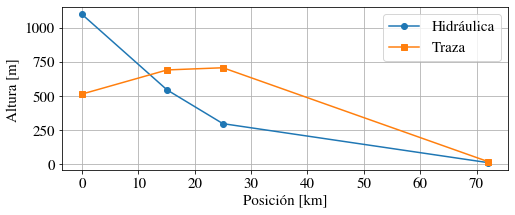

In [99]:
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(posiciones*1e-3,presiones/(Densidad*g),'o-',label='Hidráulica')
ax.plot(posiciones*1e-3,alturas,'s-',label='Traza')
ax.set_ylabel('Altura [m] ');
ax.set_xlabel('Posición [km]')
ax.legend()
ax.grid()